In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"G:\m.tech 2ndsem\nlp\absa_refined_latest.csv")

In [3]:
df

,Unnamed: 0,Clothing ID,Age,Rating,Review,Division Name,aspect_keywords,sentiment,Department Name,Class Name
0,0,767,33,4,Absolutely wonderful - silky and sexy and com...,Initmates,[],pos,Intimate,Intimates
1,1,1080,34,5,Love this dress! it's sooo pretty. i happen...,General,"['never ordered', 'ordered online', 'true midi']",pos,Dresses,Dresses
2,2,1077,60,3,Some major design flawsI had such high hopes f...,General,"['major design', 'initially ordered', 'such ho...",pos,Dresses,Dresses
3,3,1049,50,5,"My favorite buy!I love, love, love this jumpsu...",General Petite,"['favorite buy!I love', 'great compliments']",pos,Bottoms,Pants
4,4,847,47,5,Flattering shirtThis shirt is very flattering ...,General,"['adjustable front tie', 'Flattering shirt', '...",pos,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
22623,22623,1104,34,5,Great dress for many occasionsI was very happy...,General Petite,"['great price', 'easy to slip', 'Great dress',...",pos,Dresses,Dresses
22624,22624,862,48,3,Wish it was made of cottonIt reminds me of mat...,General Petite,"['long sleeves', 'soft material', 'nice sleeve...",pos,Tops,Knits
22625,22625,1104,31,3,"Cute, but see throughThis fit well, but the to...",General Petite,"['different fabric', 'fit well', 'never worked...",pos,Dresses,Dresses
22626,22626,1084,28,3,"Very cute dress, perfect for summer parties an...",General,"['much cheaper t', 'cheaper t', 'cute dress', ...",pos,Dresses,Dresses


In [64]:
df["Division Name"].value_counts()

General           13365
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

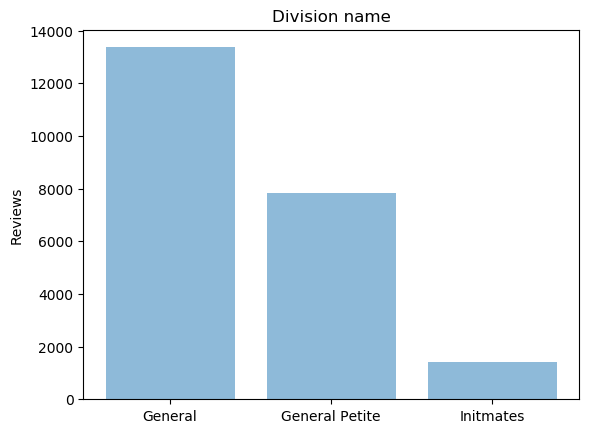

In [71]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('General', 'General Petite','Initmates')
y_pos = np.arange(len(objects))
performance = [13365,7837,1426]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

plt.title('Division name')
plt.ylabel("Reviews")

plt.show()

In [38]:
df["Department Name"].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

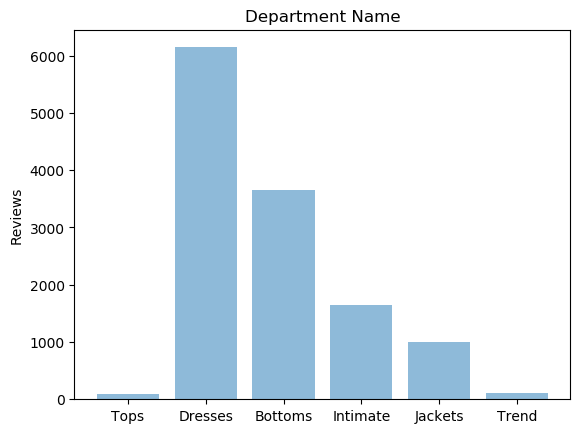

In [67]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Tops','Dresses','Bottoms','Intimate','Jackets','Trend')
y_pos = np.arange(len(objects))
performance = [100,6145,3662,1653,1002,118]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

plt.title('Department Name')
plt.ylabel("Reviews")

plt.show()

In [70]:
1617/(21011+1617)

0.07146013788226975

In [40]:
df["sentiment"].value_counts()

pos    21011
neg     1617
Name: sentiment, dtype: int64

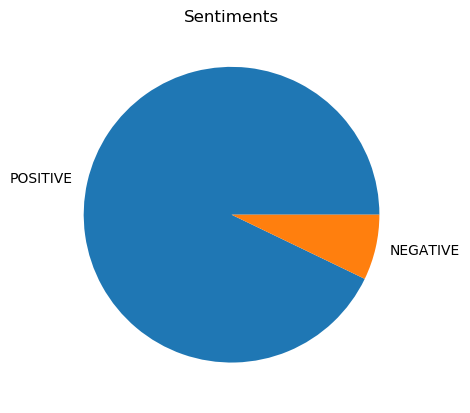

In [41]:
objects = 'POSITIVE','NEGATIVE'
y_pos = np.arange(len(objects))
performance = [21011,1617]



plt.pie(performance,labels=objects)
plt.title('Sentiments')

plt.show()

In [42]:
df['Age'][(df['Age']<=35) & (df['sentiment']=='pos')].count()


6192

In [43]:
df['Age'][(df['Age']<=35) & (df['sentiment']=='neg')].count()

484

In [44]:
df['Age'][(df['Age']>=35) & (df['sentiment']=='pos')].count()

15605

In [45]:
df['Age'][(df['Age']>=35) & (df['sentiment']=='neg')].count()

1198

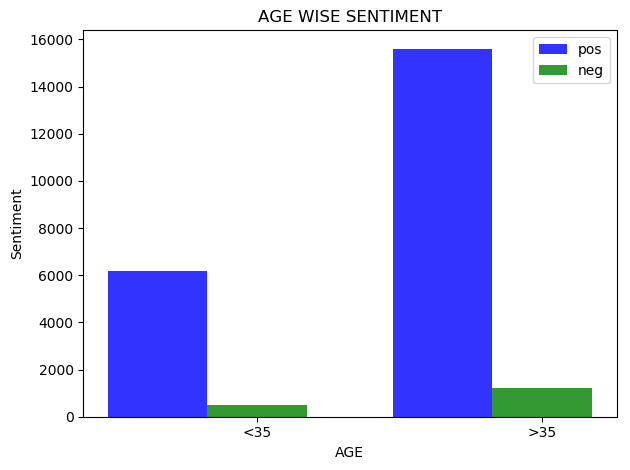

In [46]:
# data to plot
n_groups = 2
means_frank = (6192,15605)
means_guido = (484,1198)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='pos')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='neg')

plt.xlabel('AGE')
plt.ylabel('Sentiment')
plt.title('AGE WISE SENTIMENT')
plt.xticks(index + bar_width, ('<35', '>35'))
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
df["Division Name"].value_counts()

General           13365
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

In [48]:
df['Division Name'][(df['Division Name']=='General') & (df['sentiment']=='pos')].count()


12409

In [49]:
df['Division Name'][(df['Division Name']=='General Petite') & (df['sentiment']=='pos')].count()


7265

In [50]:
df['Division Name'][(df['Division Name']=='Initmates') & (df['sentiment']=='pos')].count()


1337

In [51]:
df['Division Name'][(df['Division Name']=='General') & (df['sentiment']=='neg')].count()


956

In [52]:
df['Division Name'][(df['Division Name']=='General Petite') & (df['sentiment']=='neg')].count()


572

In [53]:
df['Division Name'][(df['Division Name']=='Initmates') & (df['sentiment']=='neg')].count()


89

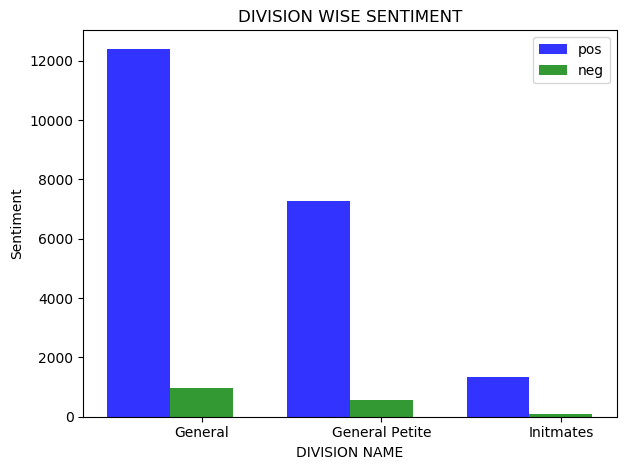

In [54]:
# data to plot
n_groups = 3
means_frank = (12409,7265,1337)
means_guido = (956,572,89)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='pos')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='neg')

plt.xlabel('DIVISION NAME')
plt.ylabel('Sentiment')
plt.title('DIVISION WISE SENTIMENT')
plt.xticks(index + bar_width, ('General', 'General Petite','Initmates'))
plt.legend()

plt.tight_layout()
plt.show()

In [55]:
g=df["Class Name"].value_counts()

In [56]:
g=pd.DataFrame(g)

In [57]:
g=g.reset_index()

In [58]:
g.head()

,index,Class Name
0,Dresses,6145
1,Knits,4626
2,Blouses,2983
3,Sweaters,1380
4,Pants,1350


Text(0, 0.5, 'reviews')

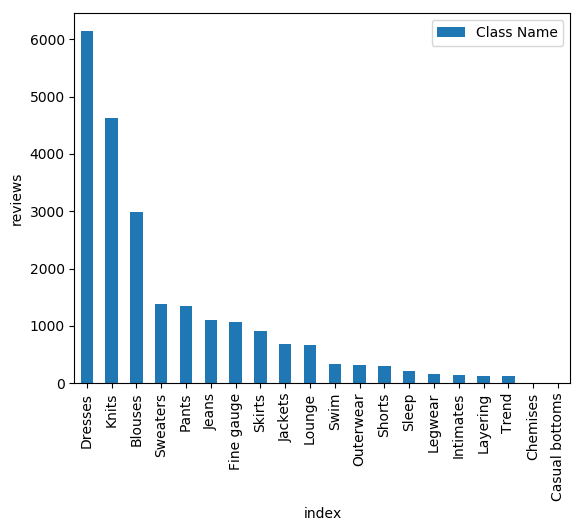

In [68]:
g.plot.bar(x='index', y='Class Name')
plt.ylabel("reviews")
plt

In [60]:
df[df["Age"]<=35,index=False]

SyntaxError: invalid syntax (<ipython-input-60-5b6840a501a8>, line 1)

In [13]:
reviews=df["sentiment"]

In [15]:
reviews.to_csv(r"G:\m.tech 2ndsem\nlp\labels.txt",index=False)

C:\Users\Suresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
